In [2]:
pip install pandas

In [4]:
pip install matplotlib

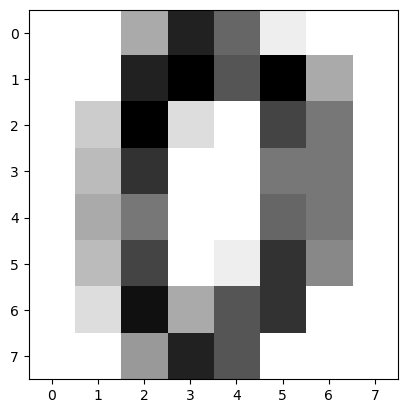

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits=datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [16]:
n_samples=len(digits.images)
data=digits.images.reshape((n_samples, -1))

In [18]:
X_train, X_test, y_train, y_test= train_test_split(
    data, digits.target, test_size=0.2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [26]:
y_pred=knn.predict(X_test)

In [28]:
scores=metrics.accuracy_score(y_test, y_pred)
print(scores)

0.975


[4]


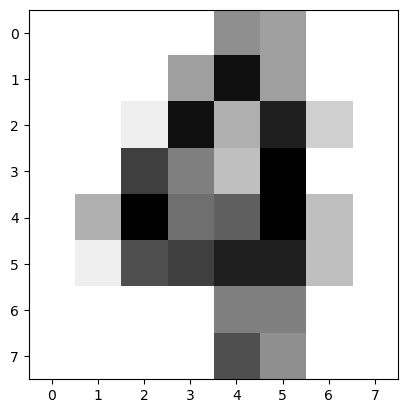

In [34]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred=knn.predict([X_test[10]])
print(y_pred)

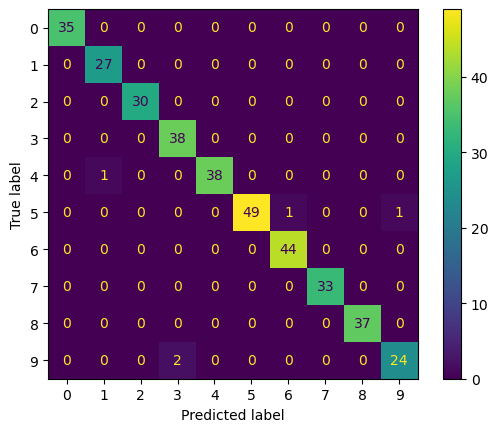

In [40]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits=datasets.load_digits()
n_samples=len(digits.images)
data=digits.images.reshape((n_samples, -1))

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test=train_test_split(data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay

# confusion matrix 시각화
disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

In [42]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [44]:
X=digits.data

In [46]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [48]:
Y=digits.target

In [50]:
Y   #원핫인코딩

array([0, 1, 2, ..., 8, 9, 8])

In [54]:
import pandas as pd
Y=pd.get_dummies(Y).values

In [58]:
Y=digits.target

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [66]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y.reshape(-1, 1))


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical

# 데이터 재분할
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Input(shape=(64,)))        # 입력층 명시적으로 추가
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  #다층 퍼셉트론(MLP) 구조로, 입력 64차원 → 은닉층 → 출력 10개(클래스 수)로 구성된 분류용 딥러닝 모델입니다.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3705 - loss: 2.1092 - val_accuracy: 0.8056 - val_loss: 1.3019
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8229 - loss: 1.0521 - val_accuracy: 0.8972 - val_loss: 0.5192
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8952 - loss: 0.4669 - val_accuracy: 0.9222 - val_loss: 0.2966
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9353 - loss: 0.2746 - val_accuracy: 0.9417 - val_loss: 0.2249
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9452 - loss: 0.1995 - val_accuracy: 0.9500 - val_loss: 0.1789
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9656 - loss: 0.1610 - val_accuracy: 0.9528 - val_loss: 0.1573
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9645 - loss: 0.1390 - val_accuracy: 0.9583 - val_loss: 0.1448
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9764 - loss: 0.1113 - val_accuracy: 0.9667 - val_loss

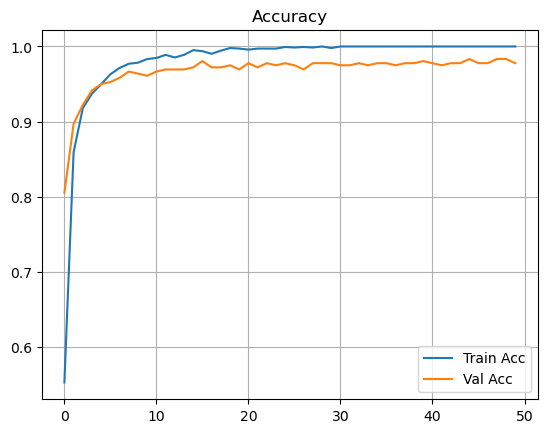

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.94      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.95      1.00      0.98        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



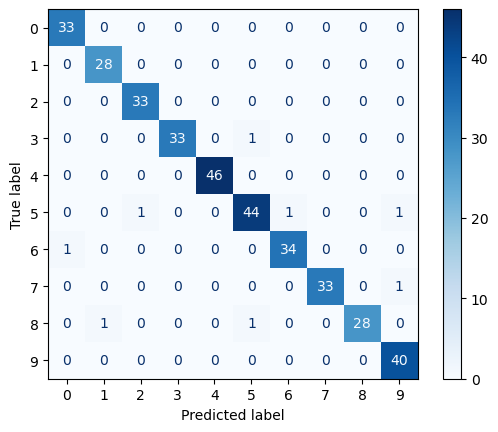

In [77]:
import numpy as np
# 정확도 및 손실 곡선
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 혼동 행렬
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()